# Name

Vladimir Kantorovich

345027767

---
#                                                  **EX 1**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the parquet file
data = pd.read_parquet('data1.parquet')
# Display the first few rows of the data
data.head()

,x,y
0,12.209516,36.021575
1,62.623142,162.746072
2,-14.712353,166.459738
3,130.624579,551.308062
4,121.652246,208.207596


In [ ]:
# Calculate the first quartile (Q1) for the 'x' column
Q1 = np.percentile(data['x'], 25)

# Calculate the third quartile (Q3) for the 'x' column
Q3 = np.percentile(data['x'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

#aply filter
data_filtered = data[(data['x'] >= lower_bound) & (data['x'] <= upper_bound)]

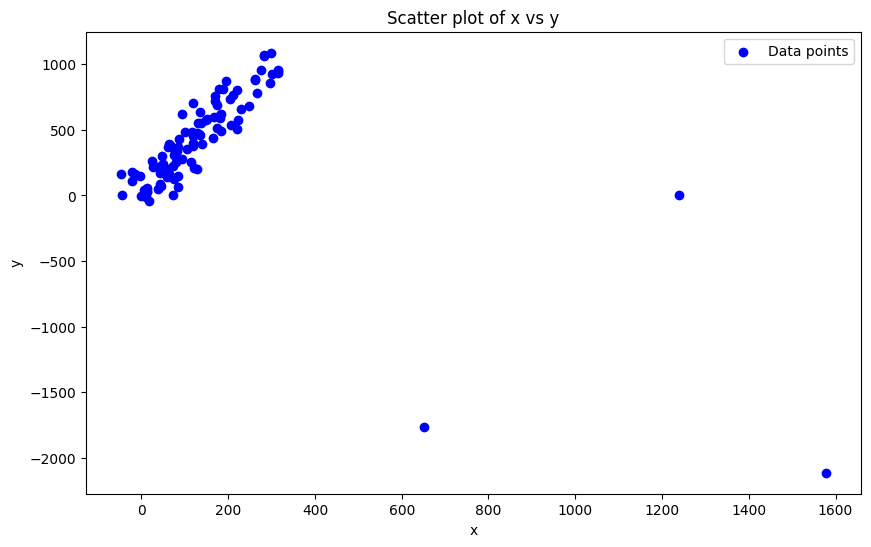

In [ ]:


# Plot the data
#raw data
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.legend()
plt.show()

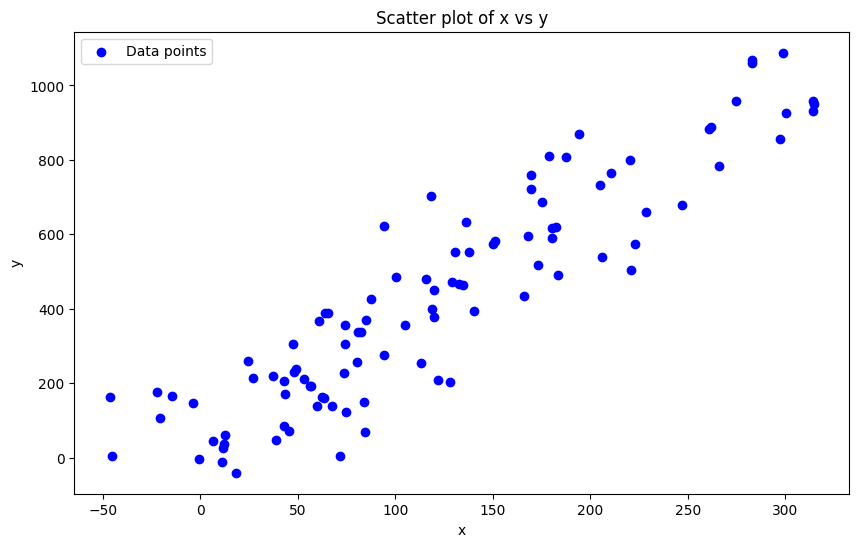

In [ ]:

# Plot the data
#filtered data
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['x'], data_filtered['y'], color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.legend()
plt.show()

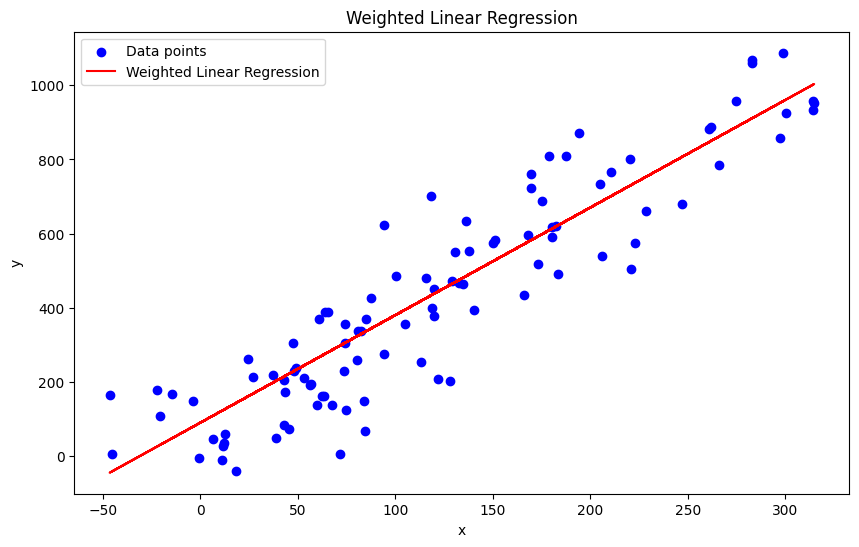

[89.70758079  2.90209597]


In [ ]:
X = data_filtered['x'].values
y = data_filtered['y'].values
# Add a column of ones to X for the intercept term in linear regression
X = np.vstack([np.ones(len(X)), X]).T
# Calculate the variance of y around its mean
sigma_y2 = np.var(y - np.mean(y))
sigma_x2 = sigma_y2 / 2

weights_x = 1 / sigma_x2
weights_y = 1 / sigma_y2
W = np.diag(weights_y + weights_x * (X[:, 1] ** 2))


XT = X.T
# Calculate the regression coefficients using weighted least squares
beta = np.linalg.inv(XT @ W @ X) @ (XT @ W @ y)


y_pred_simple_W_Er = X @ beta

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['x'], data_filtered['y'], color='blue', label='Data points')
plt.plot(data_filtered['x'], y_pred_simple_W_Er, color='red', label='Weighted Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Linear Regression')
plt.legend()
plt.show()
print(beta)

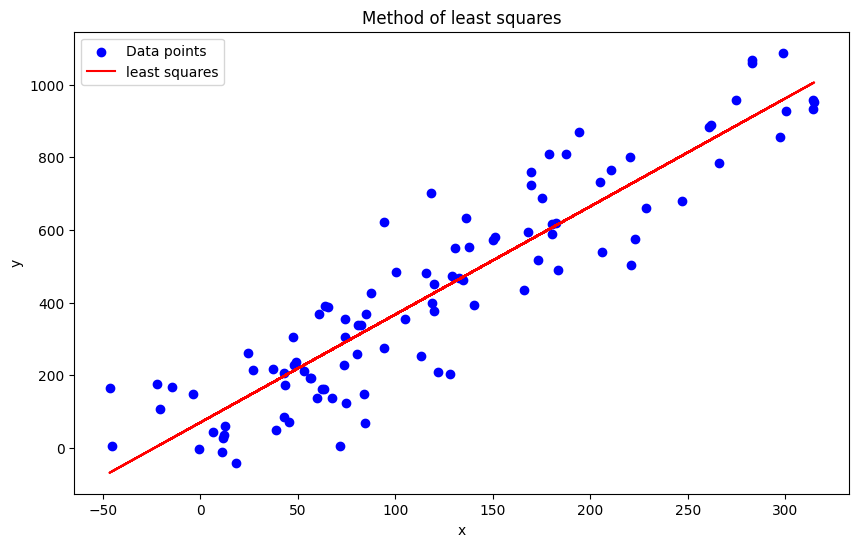

[70.02365496  2.97358505]


In [ ]:
X = data_filtered['x'].values
y = data_filtered['y'].values
XX = X ** 2
xy=np.multiply(X,y)
# Construct the matrix for the normal equations
Mfactor=np.array([[len(X),np.sum(X)],
                [np.sum(X),np.sum(XX)]])
# Construct the right-hand side of the normal equations
res=np.array([np.sum(y),np.sum(xy)])
coeff=np.linalg.inv(Mfactor).dot(res)
# Predict y using the obtained coefficients
y_pred_simple_W=coeff[0]+coeff[1]*X

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['x'], data_filtered['y'], color='blue', label='Data points')
plt.plot(data_filtered['x'], y_pred_simple_W, color='red', label='least squares')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Method of least squares')
plt.legend()
plt.show()
print(coeff)

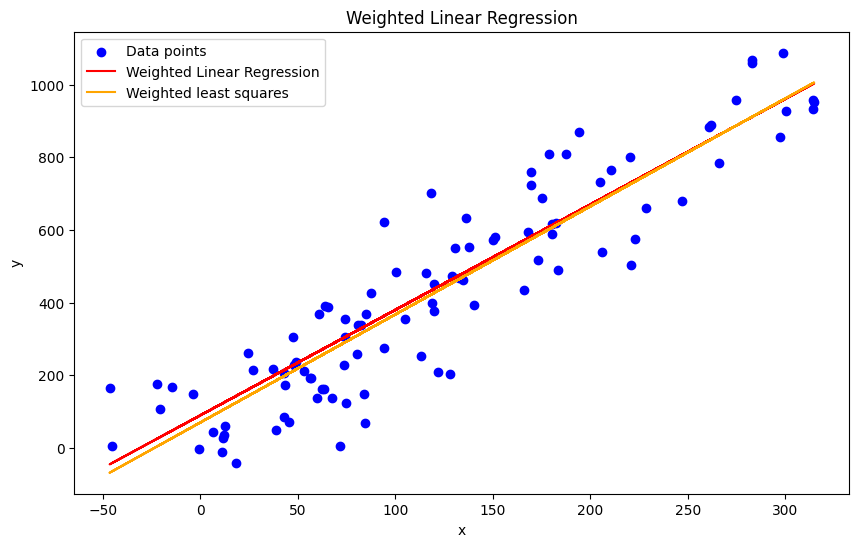

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['x'], data_filtered['y'], color='blue', label='Data points')
plt.plot(data_filtered['x'], y_pred_simple_W_Er, color='red', label='Weighted Linear Regression')
plt.plot(data_filtered['x'],y_pred_simple_W, color='orange', label='Weighted least squares')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Linear Regression')
plt.legend()
plt.show()




---
#                                                  **EX 2**
---

In [ ]:

from sklearn.linear_model import QuantileRegressor
dataTwo = pd.read_parquet('data2.parquet')
data2 = pd.read_parquet('data2.parquet')
# Display the first few rows of the data
dataTwo.head()

,x,y
0,0.00000,10.248357
1,0.10101,9.974390
2,0.20202,10.490277
3,0.30303,11.143792
4,0.40404,10.037640


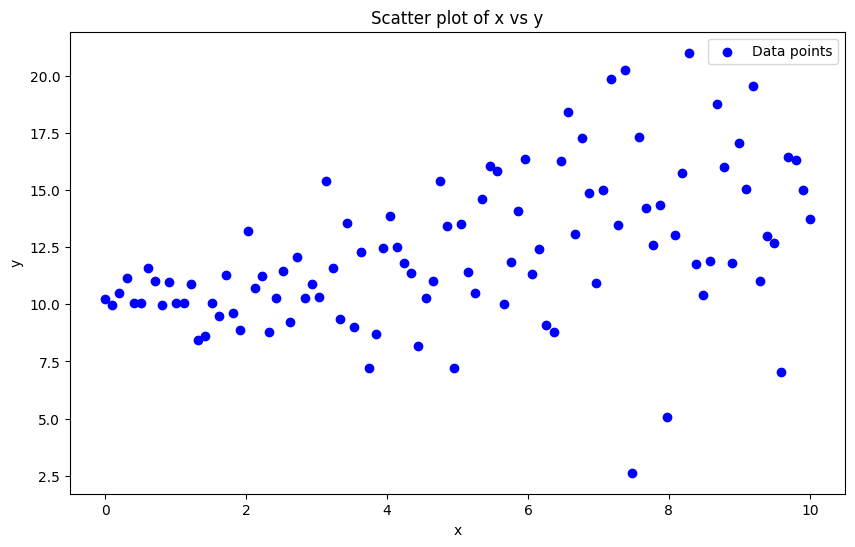

In [ ]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(dataTwo['x'], dataTwo['y'], color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.legend()
plt.show()

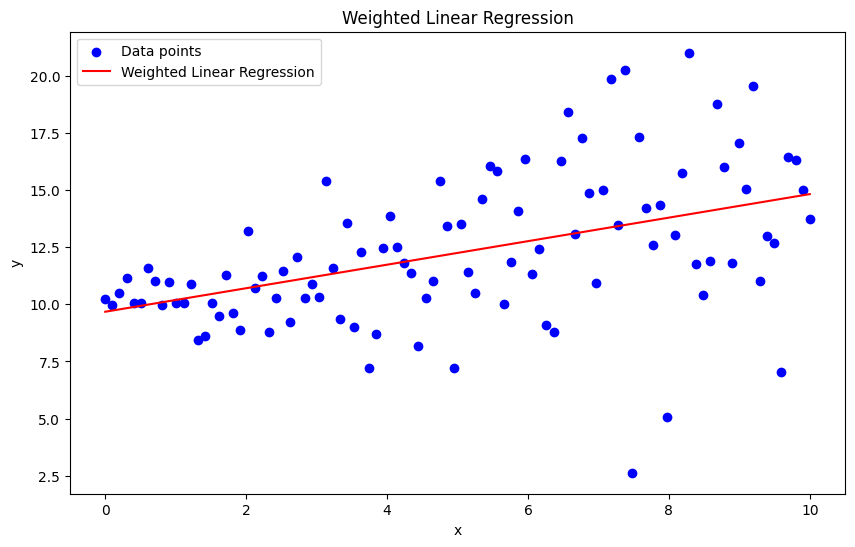

[9.67520948 0.51437679]


In [ ]:
X = dataTwo['x'].values
y = dataTwo['y'].values
XX = X ** 2
xy=np.multiply(X,y)
Mfactor=np.array([[len(X),np.sum(X)],
                [np.sum(X),np.sum(XX)]])
res=np.array([np.sum(y),np.sum(xy)])
coeff=np.linalg.inv(Mfactor).dot(res)
y_pred_simple_W=coeff[0]+coeff[1]*X

plt.figure(figsize=(10, 6))
plt.scatter(dataTwo['x'], dataTwo['y'], color='blue', label='Data points')
plt.plot(dataTwo['x'], y_pred_simple_W, color='red', label='Weighted Linear Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Linear Regression')
plt.legend()
plt.show()
print(coeff)

Mean of residuals: -0.03152533005893003
Variance of residuals: 10.685739635672757
Test of Shapiro-Wilk : Statistics=0.9121590852737427, p-value=0.004402296617627144
Test of Kolmogorov-Smirnov: Statistics=0.13727152005040458, p-value=0.4018088680747177


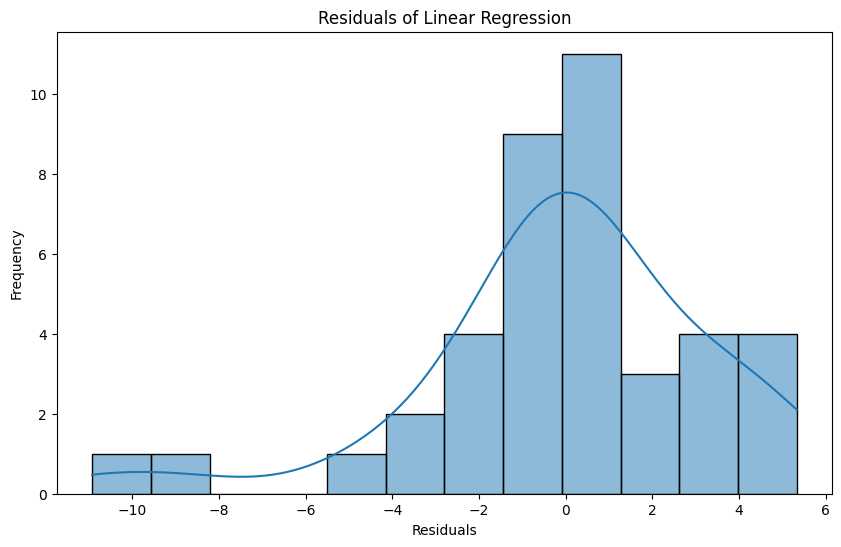

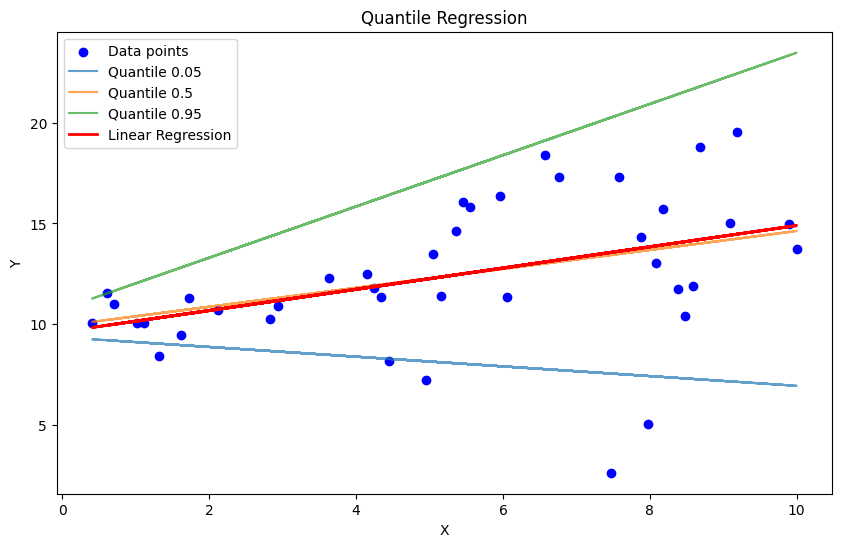

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro, kstest, norm


# Load the data
data = pd.read_parquet('data2.parquet')

X = data[['x']].values
y = data['y'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_linear

# Calculate mean and variance of residuals
mean_residuals = np.mean(residuals)
var_residuals = np.var(residuals)

print(f'Mean of residuals: {mean_residuals}')
print(f'Variance of residuals: {var_residuals}')

# Test for normality
shapiro_test = shapiro(residuals)
kstest_result = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

print(f'Test of Shapiro-Wilk : Statistics={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
print(f'Test of Kolmogorov-Smirnov: Statistics={kstest_result.statistic}, p-value={kstest_result.pvalue}')

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=12)
plt.title('Residuals of Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Quantile regression models
quantiles = [0.05, 0.5, 0.95]
quantile_models = {}

for tau in quantiles:
    model = QuantileRegressor(quantile=tau, alpha=0, solver='highs').fit(X_train, y_train)
    quantile_models[tau] = model

# Predict and plot quantile regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data points')

for tau in quantiles:
    y_quant_pred = quantile_models[tau].predict(X_test)
    plt.plot(X_test, y_quant_pred, label=f'Quantile {tau}', alpha=0.7)

plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression', linewidth=2)
plt.title('Quantile Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


How quantile regression works:

Quantile regression evaluates how independent variables affect specific points (quantiles) of the distribution of the dependent variable, rather than just the mean as in linear regression.

What minimizes/maximizes:

Minimizes: Weighted absolute deviations between predicted and observed values, allowing better assessment of the impact of outliers and skewness in the data.
Maximizes: prediction accuracy of the selected quantile.
When to use:
With heteroscedasticity (change in the spread of values ​​of the dependent variable).
When there is a skewed data distribution.
If there are outliers, to reduce their impact on the model.
When you are interested in the influence of factors on different parts of the distribution of the dependent variable (for example, lower and upper quantiles).


---
#                                                  **EX 3**
---

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error
data = pd.read_parquet('data3.parquet')
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold, GridSearchCV

data = pd.read_parquet('data3.parquet')

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['label'])
y = data['label']

# Initialize the Ridge regression model
ridge = Ridge()

# Create a range of alpha values
alphas = np.arange(0, 1.01, 0.01)
param_grid = {'alpha': alphas}

# Set up the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize the GridSearchCV object with the ridge model, parameter grid, and cross-validation scheme
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
grid_search.fit(X, y)
best_alpha = grid_search.best_params_['alpha']
best_mae = -grid_search.best_score_


print(f"The best value 𝛂: {best_alpha}")
print(f"The lowest mean absolute error (MAE): {best_mae}")



The best value 𝛂: 0.51
The lowest mean absolute error (MAE): 3.3788297594275503


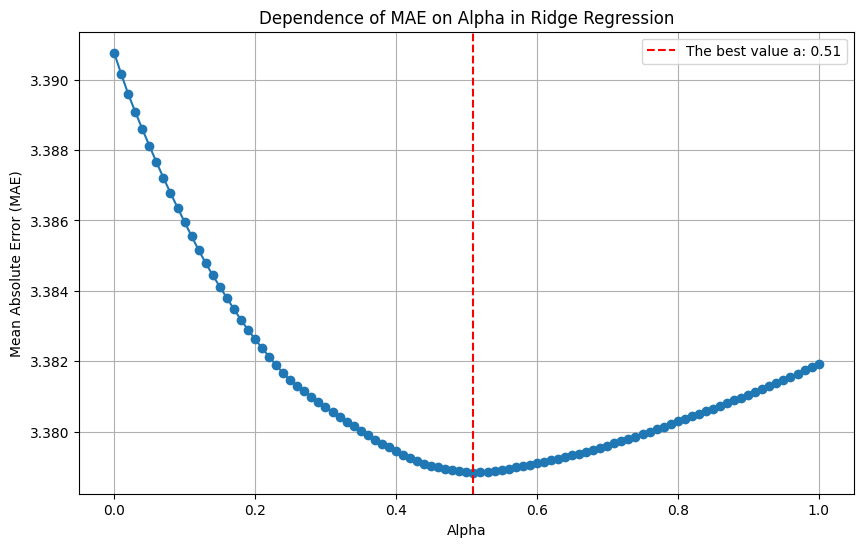

In [ ]:
# Plot the data
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_alpha'], -results['mean_test_score'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Dependence of MAE on Alpha in Ridge Regression')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'The best value a: {best_alpha}')
plt.legend()
plt.grid(True)
plt.show()